In [1]:
import graphlab

In [5]:
X = graphlab.SArray([0,1,2,3,4])
Y = graphlab.SArray([1,3,7,13,21])
print X, Y

[0L, 1L, 2L, 3L, 4L] [1L, 3L, 7L, 13L, 21L]


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

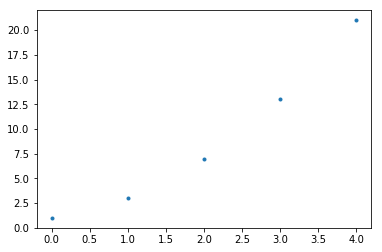

In [9]:
plt.plot(X,Y,'.')

In [29]:
initial_intercept = 0
initial_slope = 0
step_size = 0.05 #here 2n = 0.05
tolerance = 0.01
magnitude = 100 #large number 

In [11]:
def get_predictions(input_feature, intercept, slope):
    predicted_output = intercept+(input_feature*slope)
    return predicted_output

In [14]:
predictions_1 = get_predictions(X,initial_intercept,initial_slope)

In [15]:
def get_errors(predictions, output):
    errors = predictions - output
    return errors

In [17]:
errors_1 = get_errors(predictions_1,Y)
errors_1

dtype: int
Rows: 5
[-1L, -3L, -7L, -13L, -21L]

In [21]:
next_intercept =  initial_intercept-(errors_1.sum()*step_size)
next_slope = initial_slope - ((errors_1*X).sum()*step_size)
magnitude  = (errors_1.sum()**2 + (errors_1*X).sum()**2)**0.5
print next_intercept,next_slope, magnitude

2.25 7.0 147.054411699


In [30]:
while magnitude>tolerance:
    prediction = get_predictions(X,initial_intercept, initial_slope)
    error = get_errors(prediction,Y)
    print prediction,error
    initial_intercept = initial_intercept-(error.sum()*step_size)
    initial_slope = initial_slope - ((error*X).sum()*step_size)
    magnitude = (error.sum()**2+(error*X).sum()**2)**0.5
    print (initial_intercept,initial_slope,magnitude)

[0L, 0L, 0L, 0L, 0L] [-1L, -3L, -7L, -13L, -21L]
(2.25, 7.0, 147.05441169852742)
[2.25, 9.25, 16.25, 23.25, 30.25] [1.25, 6.25, 9.25, 10.25, 9.25]
(0.4375, 2.375, 99.34944640006808)
[0.4375, 2.8125, 5.1875, 7.5625, 9.9375] [-0.5625, -0.1875, -1.8125, -5.4375, -11.0625]
(1.390625, 5.59375, 67.13806320746824)
[1.390625, 6.984375, 12.578125, 18.171875, 23.765625] [0.390625, 3.984375, 5.578125, 5.171875, 2.765625]
(0.49609375, 3.5078125, 45.3930453313404)
[0.49609375, 4.00390625, 7.51171875, 11.01953125, 14.52734375] [-0.50390625, 1.00390625, 0.51171875, -1.98046875, -6.47265625]
(0.8681640625, 4.998046875, 30.719601624210483)
[0.8681640625, 5.8662109375, 10.8642578125, 15.8623046875, 20.8603515625] [-0.1318359375, 2.8662109375, 3.8642578125, 2.8623046875, -0.1396484375]
(0.402099609375, 4.06689453125, 20.825568532338544)
[0.402099609375, 4.468994140625, 8.535888671875, 12.602783203125, 16.669677734375] [-0.597900390625, 1.468994140625, 1.535888671875, -0.397216796875, -4.330322265625]
(0.

[-0.8808129415322324, 4.077379543022344, 9.03557202757692, 13.993764512131497, 18.95195699668607] [-1.8808129415322323, 1.077379543022344, 2.0355720275769205, 0.9937645121314969, -2.0480430033139285]
(-0.8897059484264624, 4.961310228488828, 0.18847376354324488)
[-0.8897059484264624, 4.071604280062365, 9.032914508551194, 13.994224737040023, 18.955534965528848] [-1.8897059484264624, 1.071604280062365, 2.032914508551194, 0.9942247370400228, -2.044465034471152]
(-0.8979345755642608, 4.9641978599688175, 0.1744118346181097)
[-0.8979345755642608, 4.066263284404557, 9.030461144373374, 13.994659004342193, 18.95885686431101] [-1.897934575564261, 1.066263284404557, 2.0304611443733744, 0.9946590043421928, -2.0411431356889906]
(-0.9055498616576044, 4.966868357797721, 0.1613990593995562)
[-0.9055498616576044, 4.0613184961401165, 9.028186853937838, 13.995055211735558, 18.96192356953328] [-1.9055498616576045, 1.0613184961401165, 2.0281868539378376, 0.9950552117355578, -2.0380764304667203]
(-0.91259657

(-0.9942069818917416, 4.997967918970868, 0.009899262071464259)


In [31]:
print "Final Intercept: %f, Final Slope: %f"%(initial_intercept,initial_slope)

Final Intercept: -0.994207, Final Slope: 4.997968


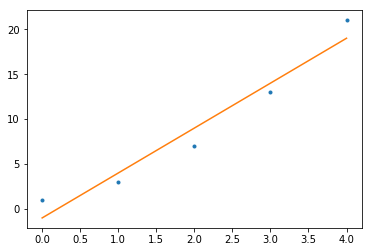

In [35]:
plt.plot(X,Y,'.',
        X,(initial_intercept+(initial_slope*X)),'-')